In [1]:
# Assume path is root directory
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import time as time
import unittest

import sys
root_dir = "../"
sys.path.append(root_dir)


from src.models import ShortestPathNet, Cvx_ShortestPathNet, Pert_ShortestPathNet, BB_ShortestPathNet
from src.models import DYS_Warcraft_Net, Pert_Warcraft_Net
from src.trainer import trainer
from src.utils import edge_to_node, node_to_edge

## Set device
device = 'cpu'
print('device: ', device)

device:  cpu


In [2]:
grid_size = 12
base_data_path = '../src/warcraft/warcraft_data/'

## Load data
data_path = base_data_path + 'Warcraft_training_data'+str(grid_size)+'.pth'
state = torch.load(data_path)

## Extract data from state
train_dataset_e = state['train_dataset_e']
test_dataset_e = state['test_dataset_e']
train_dataset_v = state['train_dataset_v']
test_dataset_v = state['test_dataset_v']

grid_size = state["m"]
A = state["A"].float()
b = state["b"].float()
num_edges = state["num_edges"]
edge_list = state["edge_list"]
edge_list_torch = torch.tensor(edge_list)

A = A.to(device)
b = b.to(device)

# ## Load model/network
# DYS_net = DYS_Warcraft_Net(A, b, edge_list, num_edges=num_edges, device=device)
# DYS_net.to(device)

In [3]:
class test_utilities(unittest.TestCase):
    
    def test_edge_to_node(self):
        # Test that edge_to_node returns correct node path
        n_samples_train = len(train_dataset_e)
        d_batch_e, path_batch_e = train_dataset_e[0:n_samples_train]
        d_batch_v, path_batch_v = train_dataset_v[0:n_samples_train]

        for i in range(n_samples_train):
            approx_path_batch = edge_to_node(path_batch_e[i,:], edge_list, grid_size, device='cpu')

if __name__ == '__main__':
    unittest.main()

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/Users/danielmckenzie/Library/Jupyter/runtime/kernel-v2-14446IgRUVdhpgaqQ.json'


AssertionError: 

### Test edge_to_node and node_to_edge

In [5]:
n_samples_train = len(train_dataset_e)
d_batch_e, path_batch_e = train_dataset_e[0:n_samples_train]
d_batch_v, path_batch_v = train_dataset_v[0:n_samples_train]

for i in range(n_samples_train):

    print('i = ', i)
    # test that edge_to_node works
    path_batch_v2 = edge_to_node(path_batch_e[i, :], edge_list, grid_size, device)
    # print(path_batch_v2)
    # print(path_batch_v[i,:,:])
    assert torch.allclose(path_batch_v2, path_batch_v[i,:,:])

    # test node_to_edge works
    path_batch_e2 = node_to_edge(path_batch_v[i:i+1,:,:], edge_list)
    assert torch.allclose(path_batch_e2, path_batch_e[i, :])


i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99
i =  100
i =  101
i =  102
i =  103
i =  104
i =  105
i =  106
i =  107
i =  108
i =  109
i =  110
i =  111
i =  112
i =  113
i =  114
i =  115
i =  116
i =  117
i =  118
i =  119
i =  120
i =  121
i =  122
i =

In [6]:
path_batch_e2 = node_to_edge(path_batch_v[0:1,:,:], edge_list)

In [7]:
torch.allclose(path_batch_e2, path_batch_e[0,:])

True

In [8]:
path_batch_e2 - path_batch_e

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [-1.,  0.,  1.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

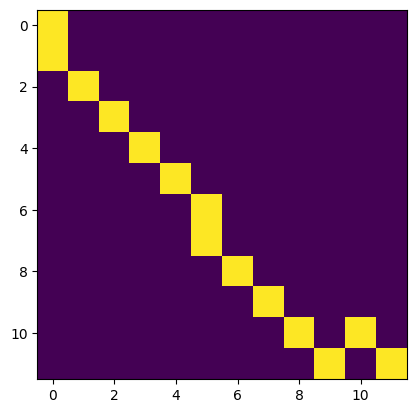

In [9]:
current_ind = 0
plt.imshow(path_batch_v[current_ind,:,:])

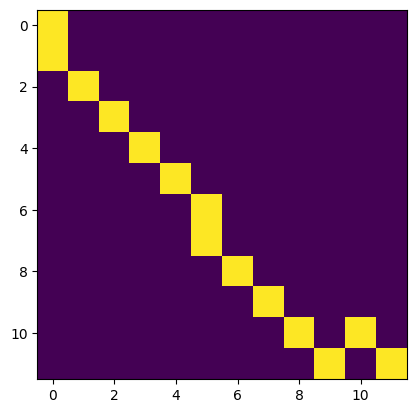

In [11]:
plt.imshow(edge_to_node(path_batch_e[current_ind, :], edge_list, grid_size, device))

In [ ]:
path_batch_v

tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [ ]:
path_pred_v = edge_to_node(path_pred_e[0,:], edge_list, m, device)

In [ ]:
path_pred_v

tensor([[1.0092, 1.0092, 1.2189, 0.6226, 0.9307, 2.1700, 1.2663, 1.1577, 0.9408,
         1.4733, 0.9391, 1.0154],
        [1.3819, 1.8840, 3.2437, 1.6348, 1.4395, 1.4045, 1.9256, 1.4444, 2.8192,
         1.5376, 1.7477, 0.4750],
        [1.7863, 1.8966, 2.6886, 1.4849, 1.9326, 1.5171, 2.8703, 0.9649, 1.2185,
         1.8032, 1.4642, 0.4962],
        [0.7364, 1.8064, 1.3889, 0.8513, 1.4145, 2.1086, 1.2603, 1.9350, 2.6512,
         1.8555, 0.7515, 1.1265],
        [0.4744, 2.1914, 1.0014, 0.8261, 1.0158, 0.4617, 1.8826, 0.7757, 1.7622,
         1.5625, 1.6873, 0.7768],
        [0.8840, 1.4778, 1.5555, 2.0741, 0.6070, 1.3145, 1.5515, 1.3257, 2.0697,
         1.7149, 1.7691, 0.8553],
        [0.5531, 0.5531, 1.4763, 1.5158, 2.7629, 1.8127, 0.4565, 1.9081, 0.9188,
         2.5251, 1.3988, 1.0761],
        [0.5716, 2.0912, 2.1146, 2.4111, 2.1377, 1.5328, 0.8188, 0.9818, 1.0564,
         1.9264, 1.7989, 0.0000],
        [1.4382, 2.0307, 1.0545, 1.9584, 2.4317, 0.6853, 0.6013, 2.1799, 0.8752,

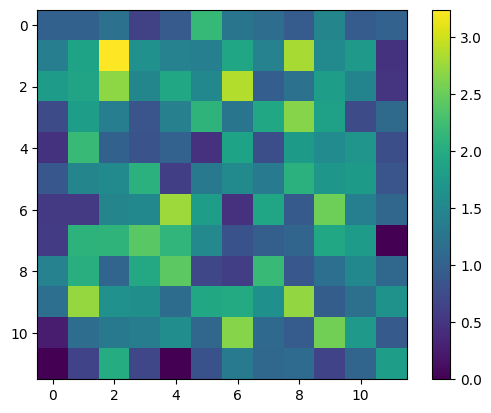

In [ ]:
plt.imshow(path_pred_v.cpu().detach().numpy())
plt.colorbar()

In [ ]:
d_batch, path_batch = test_dataset_e[0:5]
path_pred = DYS_net(d_batch).detach().cpu()

In [ ]:
ind = 0
path_batch = edge_to_node(path_batch[ind,:], edge_list=edge_list, m=m, device=device)
path_pred = edge_to_node(path_pred[ind,:], edge_list=edge_list, m=m, device=device)

In [ ]:
path_batch

tensor([[1.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
path_pred

tensor([[0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,